# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
%matplotlib inline

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [53]:
housing = pd.read_csv("../data/housing.csv")

In [54]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [55]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [56]:
housing.shape

(20640, 10)

In [57]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [58]:
housing.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [59]:
ocean_mean_df = (
    housing
    .groupby("ocean_proximity")["median_house_value"]
    .mean()
    .reset_index(name="mean_median_value")
    .sort_values(by="mean_median_value", ascending=True)
    .reset_index(drop=True)
)
ocean_mean_df

,ocean_proximity,mean_median_value
0,INLAND,124805.392001
1,<1H OCEAN,240084.285464
2,NEAR OCEAN,249433.977427
3,NEAR BAY,259212.311790
4,ISLAND,380440.000000


In [60]:
#I choose to group the only "ISLAND" data with the "NEAR OCEAN" as it make sense for me
# The goal is categorized columns "ocean_proximity" (object) and transform it into numerical categorized column "ocean_proximmity_code" in order to have a dataset with only numerical data

# 1) Replace ISLAND as NEAR OCEAN
housing["ocean_proximity_code"] = (
    housing["ocean_proximity"]
    .replace({"ISLAND": "NEAR OCEAN"})
)

# 2) Map the value for categorization
mean_df = (
    housing
    .groupby("ocean_proximity_code")["median_house_value"]
    .mean()
    .sort_values()
    .reset_index()
)

mapping = {
    cat: code
    for code, cat in enumerate(mean_df["ocean_proximity_code"])
}

mapping


{'INLAND': 0, '<1H OCEAN': 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3}

In [61]:
# 3) Create a new numerical column "ocean_proximity_code"
housing["ocean_proximity_code"] = housing["ocean_proximity_code"].map(mapping)

In [62]:
# 5) Checking housing shape again
housing.dtypes

longitude               float64
latitude                float64
housing_median_age      float64
total_rooms             float64
total_bedrooms          float64
population              float64
households              float64
median_income           float64
median_house_value      float64
ocean_proximity          object
ocean_proximity_code      int64
dtype: object

#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

In [63]:
h_columns = housing.columns
h_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_code'],
      dtype='object')

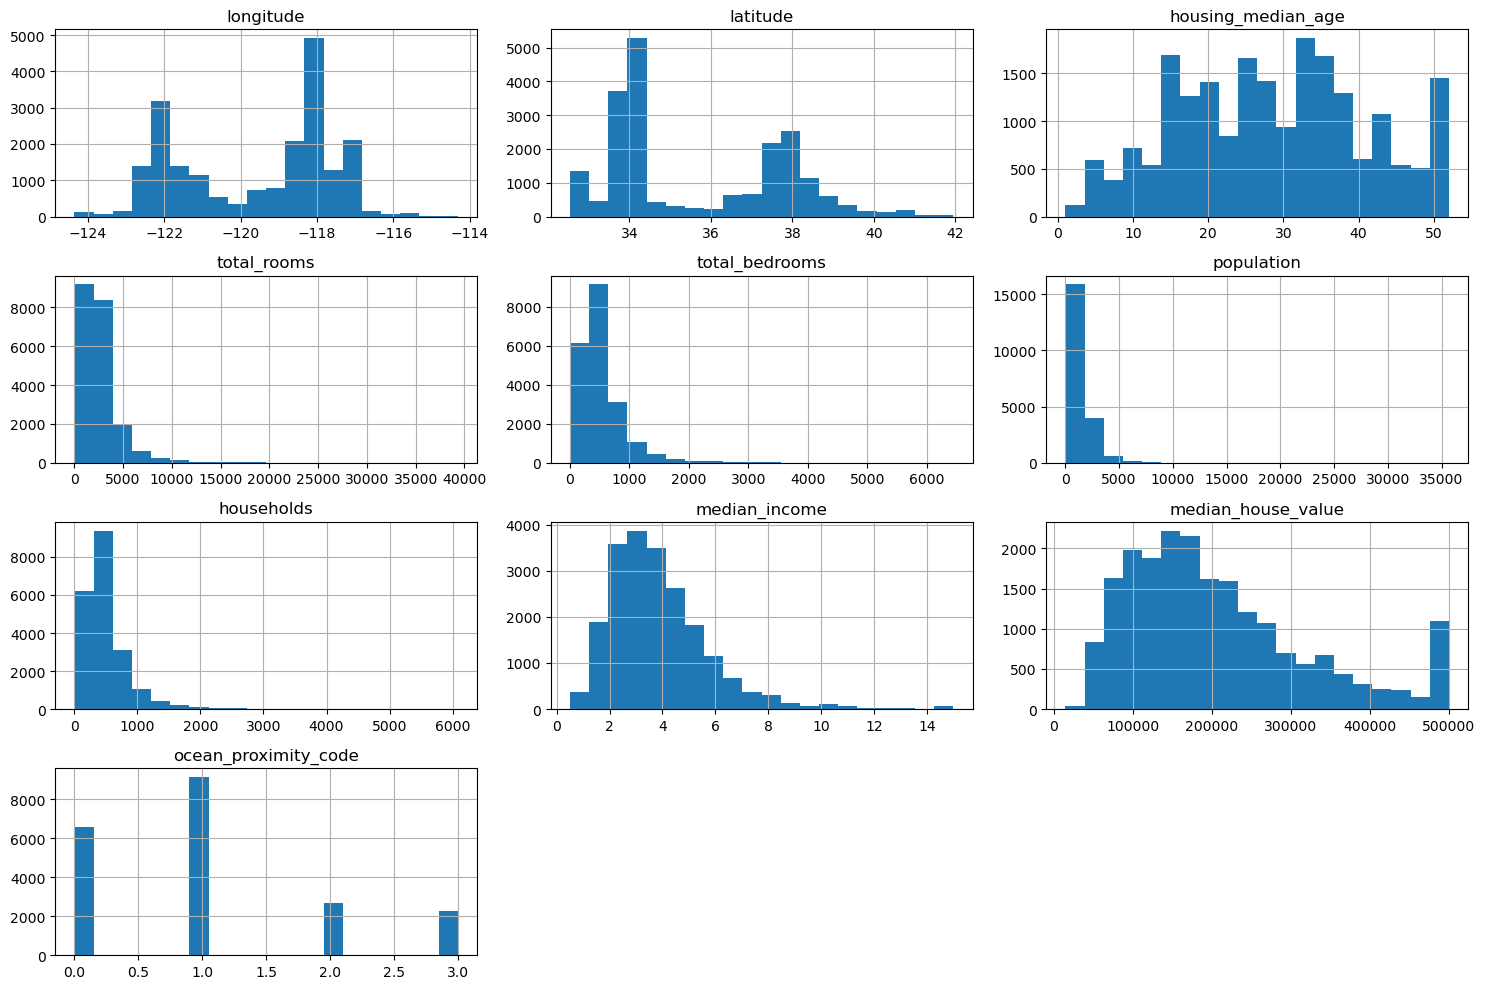

In [64]:
housing[h_columns].hist(bins=20, figsize=(15, 10))
plt.tight_layout()   # pour ajuster les espaces entre les plots
plt.show()

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [65]:
missing_info = pd.DataFrame({
    "has_missing": housing.isna().any(),
    "missing_count": housing.isna().sum(),
    "missing_pct": (housing.isna().sum() / len(housing) * 100).round(2)
})

missing_info = missing_info[missing_info["has_missing"]]
print(missing_info)
cols_with_na = missing_info.index.tolist()
print(cols_with_na)

                has_missing  missing_count  missing_pct
total_bedrooms         True            207          1.0
['total_bedrooms']


In [66]:
housing_cleaned = housing.dropna(subset= cols_with_na).copy()

2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [67]:
# Room per household
housing_cleaned.loc[:, "room_per_household"] = housing_cleaned["total_rooms"]/housing_cleaned["households"]

In [68]:
# Population per household
housing_cleaned.loc[:, "population_per_household"] = housing_cleaned["population"]/housing_cleaned["households"]

In [69]:
# Bedrooms per room
housing_cleaned.loc[:, "bedrooms_per_room"] = housing_cleaned["total_bedrooms"]/housing_cleaned["total_rooms"]

In [70]:
housing_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_code,room_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,2.181467,0.172096


3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [71]:
# on suppose que ton DataFrame nettoyé s'appelle housing_cleaned

# Check small outliers
small_out = housing_cleaned["room_per_household"].nsmallest(2)
# Check large outliers
large_out = housing_cleaned["room_per_household"].nlargest(2)

# Index and value
print("Small outliers :\n", small_out)
print("Large outliers :\n", large_out)

# CHeck outliers on the dataframe
housing_cleaned.loc[ small_out.index.union(large_out.index) ]


Small outliers :
 5916    0.846154
8219    0.888889
Name: room_per_household, dtype: float64
Large outliers :
 1914    141.909091
1979    132.533333
Name: room_per_household, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_code,room_per_household,population_per_household,bedrooms_per_room
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,INLAND,0,141.909091,2.727273,0.180653
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,0,132.533333,2.400000,0.257042
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,1,0.846154,1.846154,1.000000
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,2,0.888889,2.666667,0.562500


In [72]:
# Droppping the outliers by index
to_drop = small_out.index.union(large_out.index)
housing_cleaned = housing_cleaned.drop(index=to_drop)

In [73]:
housing_cleaned.shape

(20429, 14)

# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

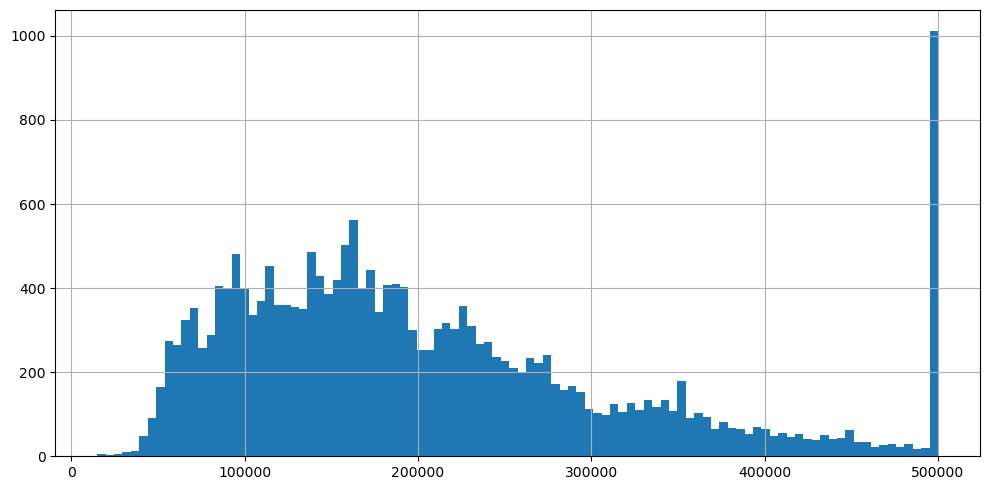

In [74]:
housing["median_house_value"].hist(bins=100, figsize=(10, 5))
plt.tight_layout() 
plt.show()

2. Check out what variables correlates the most with "median house value"

In [76]:
# 1) Correlation matrix with all numerical columns
corr_matrix = housing_cleaned.select_dtypes(include="number").corr()

# 2) Dropping predicting variable « median_house_value » column and correlation and sort the corr matrix.
corr_target = (
    corr_matrix["median_house_value"]
    .drop("median_house_value")
    .sort_values(ascending=False)
)

print(corr_target)


median_income               0.688652
ocean_proximity_code        0.396690
room_per_household          0.170930
total_rooms                 0.133314
housing_median_age          0.106462
households                  0.064978
total_bedrooms              0.049701
population_per_household   -0.023645
population                 -0.025248
longitude                  -0.045342
latitude                   -0.144894
bedrooms_per_room          -0.256741
Name: median_house_value, dtype: float64


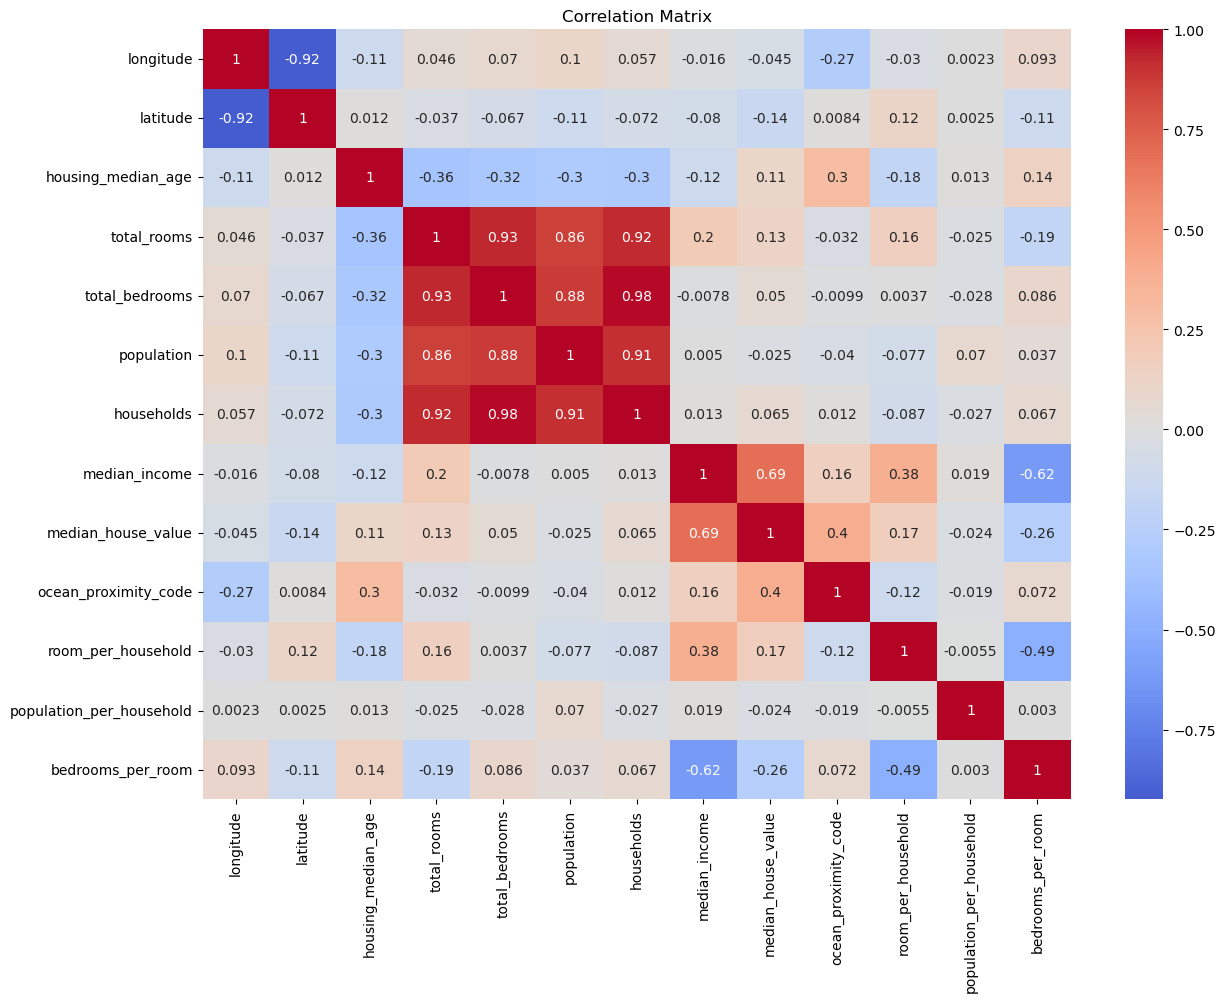

In [77]:
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

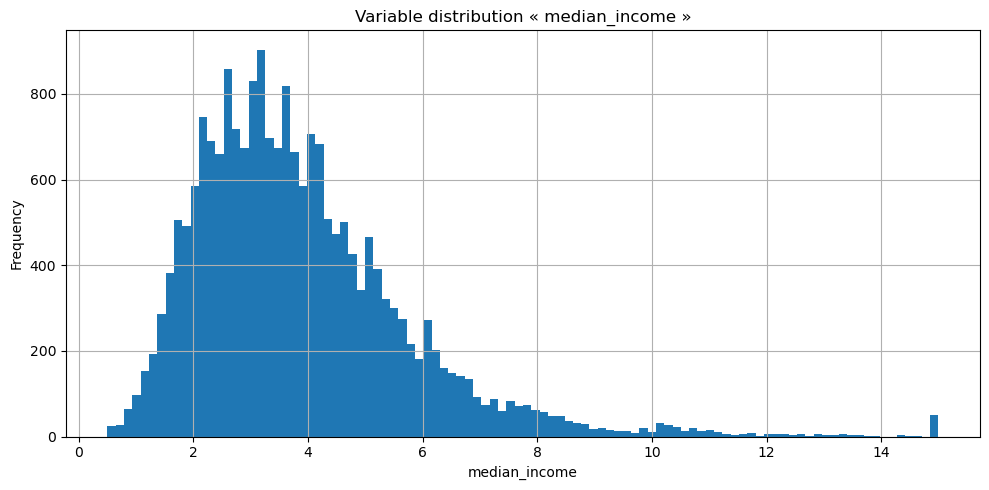

In [78]:
top_col = corr_target.abs().idxmax()

plt.figure(figsize=(10, 5))
housing_cleaned[top_col].hist(bins=100)
plt.title(f"Variable distribution « {top_col} »")
plt.xlabel(top_col)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

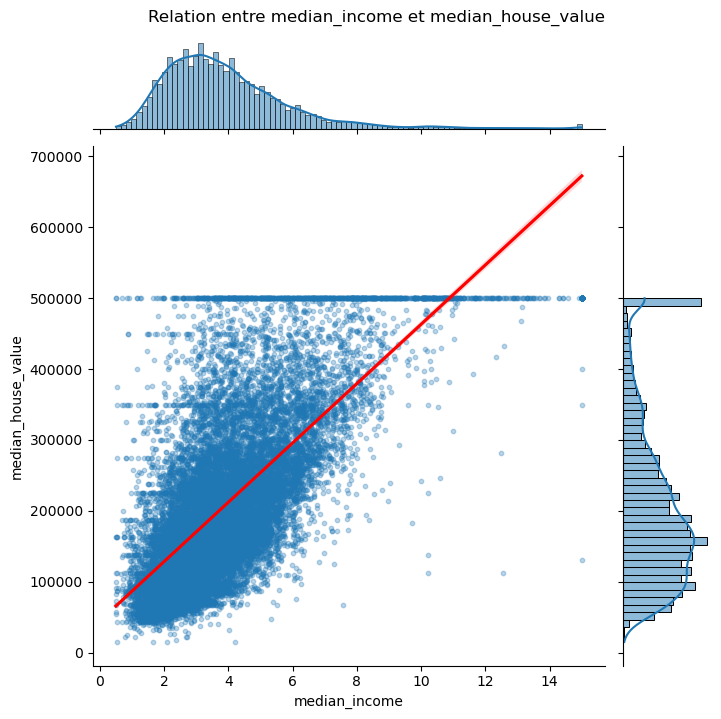

In [79]:
sns.jointplot(
    data=housing_cleaned,
    x="median_income",
    y="median_house_value",
    kind="reg",
    height=7,        # taille du graphe
    scatter_kws={"s": 10, "alpha": 0.3},  # points un peu transparents
    line_kws={"color": "red"}             # ligne de régression en rouge
)

plt.suptitle("Relation entre median_income et median_house_value", y=1.02)
plt.show()

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

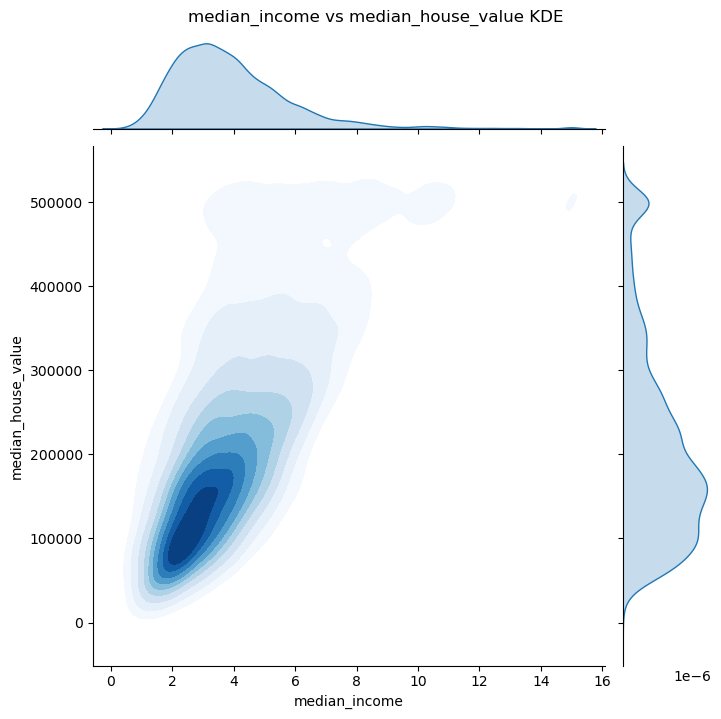

In [80]:
sns.jointplot(
    data=housing_cleaned,
    x="median_income",
    y="median_house_value",
    kind="kde",
    height=7, 
    fill=True,          # fill the edges
    thresh=0.05,        #  minimum density
    cmap="Blues"        # color palet
)

plt.suptitle("median_income vs median_house_value KDE", y=1.02)
plt.show()

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [81]:

# 1) Calculer les bornes de coupe aux quantiles
quantiles = housing_cleaned["median_income"].quantile([0, 0.25, 0.5, 0.75, 0.95, 1]).values
# quantiles est un array de 6 valeurs croissantes

# 2) Définir les étiquettes
labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"]

# 3) Découper la variable et créer la nouvelle colonne
housing_cleaned["income_cat"] = pd.cut(
    housing_cleaned["median_income"],
    bins=quantiles,
    labels=labels,
    include_lowest=True
)

# 4) Vérifier la répartition
print(housing_cleaned["income_cat"].value_counts())

income_cat
Low              5108
Below_Average    5107
Above_Average    5107
High             4085
Very High        1022
Name: count, dtype: int64


2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

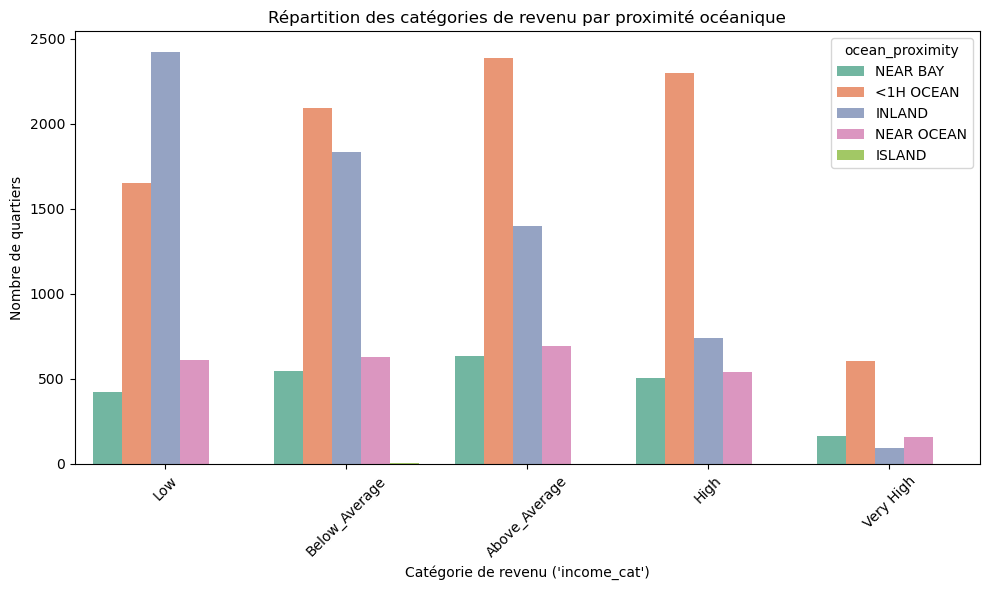

In [83]:
# Plot the count of income categories with hue set to ocean_proximity
plt.figure(figsize=(10, 6))
sns.countplot(
    data=housing_cleaned,
    x="income_cat",
    hue="ocean_proximity",
    palette="Set2"
)
plt.xticks(rotation=45)
plt.title("Répartition des catégories de revenu par proximité océanique")
plt.xlabel("Catégorie de revenu ('income_cat')")
plt.ylabel("Nombre de quartiers")
plt.tight_layout()
plt.show()

Several trends emerge from this chart:

1. Domination of “INLAND” at the lower end of the income scale
Neighborhoods classified as INLAND (grey) account for the bulk of the Low and Below_Average categories. In other words, interior areas tend to have the lowest incomes.

2. Coastal zones dominate the high-income brackets
NEAR BAY (green) and NEAR OCEAN (purple) are heavily represented in the High and Very High categories. Living on the bay or directly on the ocean correlates with higher purchasing power.

3. The “<1H OCEAN” category is very spread out
These neighborhoods (orange) appear across all income brackets, peaking in Above_Average and High—making them an “accessible yet still quite expensive” compromise.

4. Isolated Island
As anticipated, ISLAND (yellow) is almost absent (one or two occurrences) and only appears in the Very High income bracket.

### Conclusion:
Proximity to water = higher median income. Interior areas (INLAND) are predominantly low-income, while directly coastal zones (NEAR BAY, NEAR OCEAN) attract higher incomes, and the “<1H OCEAN” category spans from middle to very high incomes.

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

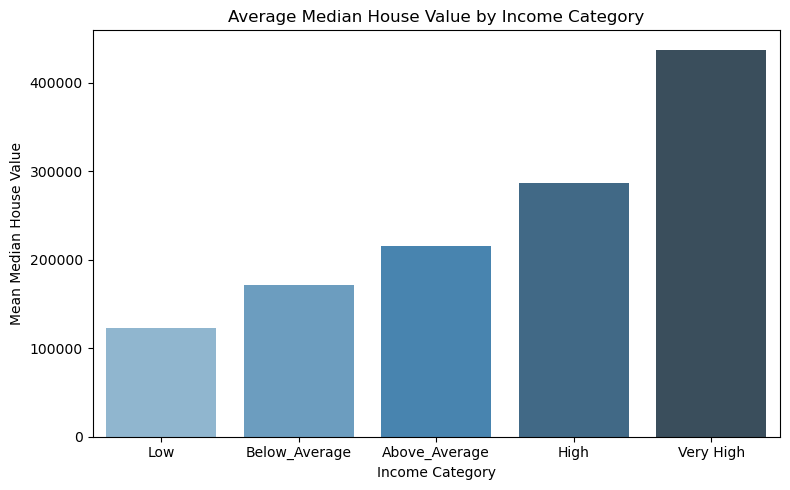

In [86]:
# 1) Barplot of average house value by income category
plt.figure(figsize=(8, 5))
sns.barplot(
    data=housing_cleaned,
    x="income_cat",
    y="median_house_value",
    hue="income_cat",
    errorbar=None,
    palette="Blues_d",
    dodge=False,
    legend=False
)

plt.title("Average Median House Value by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Mean Median House Value")
plt.tight_layout()
plt.show()

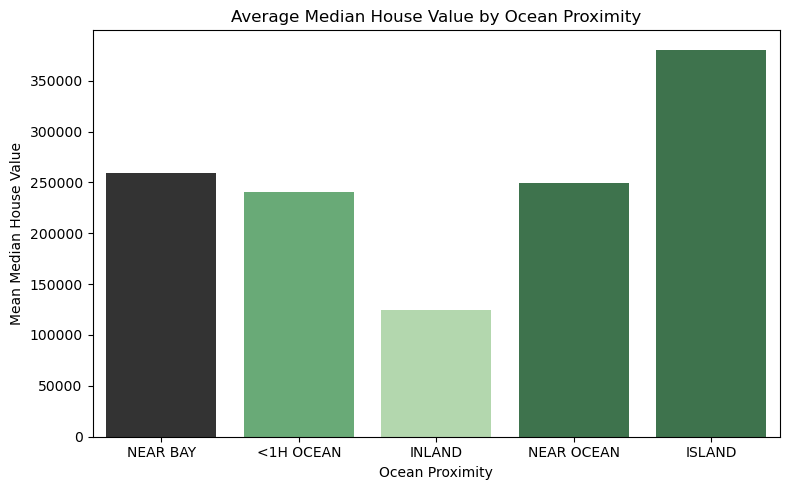

In [95]:
# 2) Barplot of average house value by ocean proximity
plt.figure(figsize=(8, 5))
sns.barplot(
    data=housing_cleaned,
    x="ocean_proximity",
    y="median_house_value",
    hue="ocean_proximity_code",
    errorbar=None,
    palette="Greens_d",
    dodge=False,
    legend=False
)
plt.title("Average Median House Value by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Mean Median House Value")
plt.tight_layout()
plt.show()


4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [98]:
mapping = {
    'INLAND': 0,
    '<1H OCEAN': 1,
    'NEAR BAY': 2,
    'NEAR OCEAN': 3
}

inv_map = {v: k for k, v in mapping.items()}
# Résultat : {0: 'INLAND', 1: '<1H OCEAN', 2: 'NEAR BAY', 3: 'NEAR OCEAN'}


In [100]:
pivot_df = (
    housing_cleaned
    .pivot_table(
        index="income_cat",
        columns="ocean_proximity_code",
        values="median_house_value",
        aggfunc="count",
        observed=False    # ← ajoutez ceci pour lever le warning
    )
    .rename(columns=inv_map)
    .reindex(
        index=["Low","Below_Average","Above_Average","High","Very High"],
        columns=["INLAND","<1H OCEAN","NEAR BAY","NEAR OCEAN"]
    )
)

print(pivot_df)

ocean_proximity_code  INLAND  <1H OCEAN  NEAR BAY  NEAR OCEAN
income_cat                                                   
Low                     2423       1651       612         422
Below_Average           1835       2096       630         546
Above_Average           1398       2386       691         632
High                     743       2297       540         505
Very High                 95        603       159         165


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

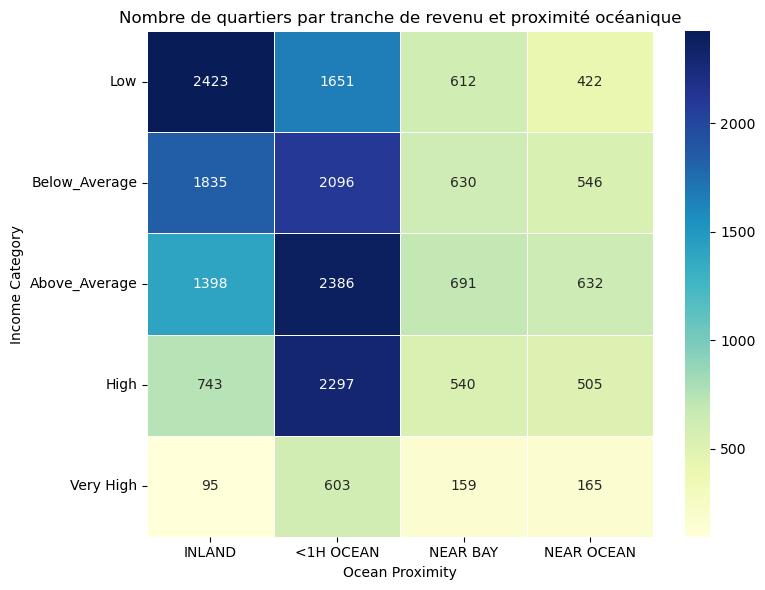

In [101]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_df,        # votre DataFrame pivoté : index = income_cat, colonnes = ocean_proximity
    annot=True,      # annotation des cellules
    fmt='d',         # format entier
    cmap='YlGnBu',   # palette au choix
    linewidths=.5    # fines séparations
)
plt.title("Nombre de quartiers par tranche de revenu et proximité océanique")
plt.xlabel("Ocean Proximity")
plt.ylabel("Income Category")
plt.tight_layout()
plt.show()

`Line “Low”:` There are many INLAND neighborhoods (2,423), followed by <1H OCEAN (1,651), and relatively few in NEAR BAY (612) or NEAR OCEAN (422).

`Line “Below_Average”:` <1H OCEAN slightly dominates (2,096), then INLAND (1,835), with NEAR BAY and NEAR OCEAN coming last.

`Line “Above_Average”:` <1H OCEAN remains in the lead (2,386), followed by INLAND (1,398), NEAR BAY (691), and NEAR OCEAN (632).

`Line “High”:` A very strong predominance of <1H OCEAN (2,297) ahead of INLAND (743), NEAR BAY (540), and NEAR OCEAN (505).

`Line “Very High”:` These cases are rare but still mostly <1H OCEAN (603), then NEAR OCEAN (165), NEAR BAY (159), and very few INLAND (95).

### What this heatmap confirms
- INLAND areas concentrate the vast majority of low-income neighborhoods.

- <1H OCEAN is the most frequent category across all income brackets, especially in the “Above_Average” and “High” ranges.

- Direct coastal zones (NEAR BAY / NEAR OCEAN) remain numerical minorities but are over-represented in the higher income brackets compared to INLAND.

- Very High incomes are rare everywhere, but are found primarily in coastal zones (<1H OCEAN, NEAR OCEAN, NEAR BAY).

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [ ]:
import scipy.stats as stats

3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

4. Save our predicting variable to `y`.

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [ ]:
from sklearn import metrics

#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

2. Print the mean_squared_error and R^2-score again. What has happened?

3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

2. Make prediction on the test data and evaluate you results.